# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

# Load dataset

In [2]:
df=pd.read_csv('/Users/eman./Desktop/BootCamp/project_regression/Diamonds_webscrapping.csv')
df

,id,url,0,shape,price,carat,cut,color,clarity,report,LW,type,date_fetched
0,12316229,https://www.brilliantearth.com//loose-diamonds...,NaN,Round,430,0.32,Super Ideal,I,SI2,GIA,1.00,natural,2021-10-21 09-37 PM
1,12316283,https://www.brilliantearth.com//loose-diamonds...,NaN,Round,440,0.30,Very Good,F,SI2,GIA,1.00,natural,2021-10-21 09-37 PM
2,12335848,https://www.brilliantearth.com//loose-diamonds...,NaN,Round,440,0.30,Very Good,E,SI2,GIA,1.00,natural,2021-10-21 09-37 PM
3,12320460,https://www.brilliantearth.com//loose-diamonds...,NaN,Round,450,0.30,Very Good,I,SI2,GIA,1.00,natural,2021-10-21 09-37 PM
4,12219956,https://www.brilliantearth.com//loose-diamonds...,NaN,Round,450,0.30,Very Good,I,SI2,GIA,1.00,natural,2021-10-21 09-37 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88169,11944611,https://www.brilliantearth.com//lab-diamonds-s...,NaN,Cushion,97000,10.25,Good,E,VS1,IGI,1.05,lab,2021-10-21 09-37 PM
88170,12319628,https://www.brilliantearth.com//lab-diamonds-s...,NaN,Oval,102160,8.24,Super Ideal,D,VS1,IGI,1.39,lab,2021-10-21 09-37 PM
88171,12332529,https://www.brilliantearth.com//lab-diamonds-s...,NaN,Asscher,115560,10.03,Ideal,E,VVS2,IGI,1.03,lab,2021-10-21 09-37 PM
88172,12319822,https://www.brilliantearth.com//lab-diamonds-s...,NaN,Radiant,131260,6.11,Ideal,E,VVS2,GCAL,1.37,lab,2021-10-21 09-37 PM


# Drop unnecessary columns

In [3]:
df.drop(['url','id','date_fetched','0','report','type'],axis=1,inplace=True)

In [4]:
df.head()

,shape,price,carat,cut,color,clarity,LW
0,Round,430,0.32,Super Ideal,I,SI2,1.0
1,Round,440,0.30,Very Good,F,SI2,1.0
2,Round,440,0.30,Very Good,E,SI2,1.0
3,Round,450,0.30,Very Good,I,SI2,1.0
4,Round,450,0.30,Very Good,I,SI2,1.0


In [5]:
df.tail()

,shape,price,carat,cut,color,clarity,LW
88169,Cushion,97000,10.25,Good,E,VS1,1.05
88170,Oval,102160,8.24,Super Ideal,D,VS1,1.39
88171,Asscher,115560,10.03,Ideal,E,VVS2,1.03
88172,Radiant,131260,6.11,Ideal,E,VVS2,1.37
88173,Round,145210,3.56,Super Ideal,H,VS2,1.00


In [6]:
df.sample(5)

,shape,price,carat,cut,color,clarity,LW
57411,Oval,3720,2.00,Super Ideal,J,VS2,1.36
56740,Cushion,3640,2.02,Very Good,J,SI2,1.07
50894,Round,2870,1.06,Ideal,D,VS1,1.00
28621,Oval,1450,1.00,Ideal,I,VVS2,1.40
25920,Round,1260,0.92,Super Ideal,G,SI2,1.00


# Strip columns name

In [7]:
df.columns=[column.strip() for column in df.columns]
df.columns

Index(['shape', 'price', 'carat', 'cut', 'color', 'clarity', 'LW'], dtype='object')

In [8]:
df.columns.unique()

Index(['shape', 'price', 'carat', 'cut', 'color', 'clarity', 'LW'], dtype='object')

# Drop duplicated values

In [9]:
df.drop_duplicates(subset=['shape','price','carat','cut','color','clarity','LW'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67340 entries, 0 to 88173
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   shape    67340 non-null  object 
 1   price    67340 non-null  int64  
 2   carat    67340 non-null  float64
 3   cut      67340 non-null  object 
 4   color    67340 non-null  object 
 5   clarity  67340 non-null  object 
 6   LW       67340 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [11]:
df

,shape,price,carat,cut,color,clarity,LW
0,Round,430,0.32,Super Ideal,I,SI2,1.00
1,Round,440,0.30,Very Good,F,SI2,1.00
2,Round,440,0.30,Very Good,E,SI2,1.00
3,Round,450,0.30,Very Good,I,SI2,1.00
5,Round,460,0.30,Very Good,I,SI2,1.00
...,...,...,...,...,...,...,...
88169,Cushion,97000,10.25,Good,E,VS1,1.05
88170,Oval,102160,8.24,Super Ideal,D,VS1,1.39
88171,Asscher,115560,10.03,Ideal,E,VVS2,1.03
88172,Radiant,131260,6.11,Ideal,E,VVS2,1.37


# Do limitations on price

In [12]:
df.drop(df[df.price > 25000].index, inplace=True)

# Checking for outliers and drop it

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

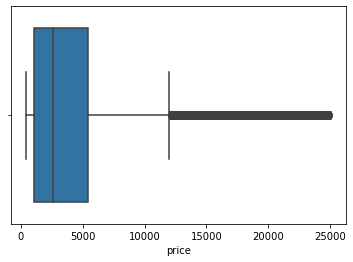

In [13]:
sns.boxplot(df.price)

In [14]:
# outliers
q3= df.price.quantile(q=0.75)
q1= df.price.quantile(q=0.25)
Iqr = q3 - q1 
OUTLIERS = q3 + 1.5 * Iqr
OUTLIERS

12018.75

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

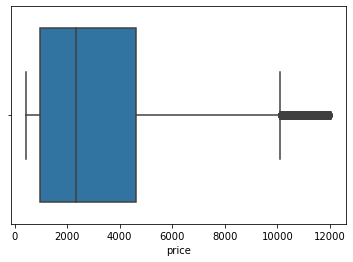

In [15]:
sns.boxplot(df[df.price<= OUTLIERS].price)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

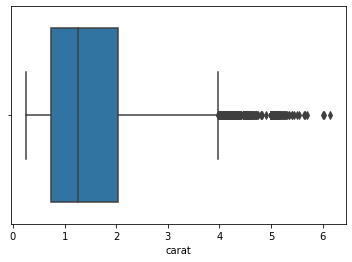

In [16]:
sns.boxplot(df.carat)

In [17]:
# outliers
Q3= df.carat.quantile(q=0.75)
Q1= df.carat.quantile(q=0.25)
IQR = Q3 - Q1 
outliers = Q3 + 1.5 * IQR
outliers

3.9799999999999995

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

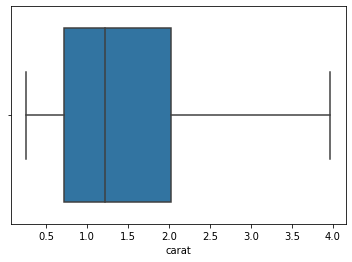

In [18]:
sns.boxplot(df[df.carat<= outliers].carat)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

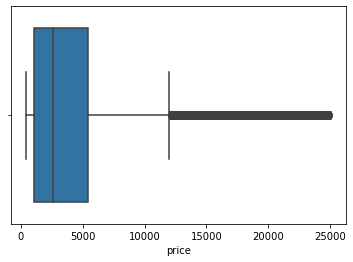

In [19]:
sns.boxplot(df.price)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LW'>

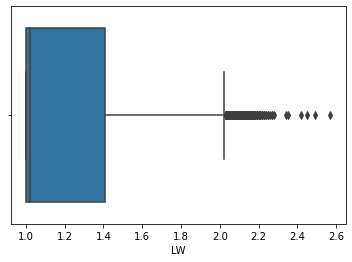

In [20]:
sns.boxplot(df.LW)

In [21]:
# outliers
Q_3_3= df.LW.quantile(q=0.75)
Q_1_3= df.LW.quantile(q=0.25)
IQR_3 = Q_3_3 - Q_1_3 
outliers_3 = Q_3_3 + 1.5 * IQR_3
outliers_3

2.025

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LW'>

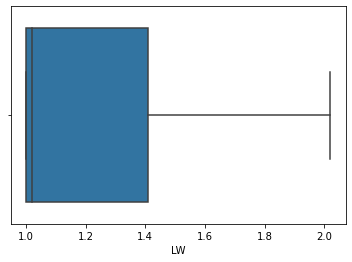

In [22]:
sns.boxplot(df[df.LW<= outliers_3].LW)

# Log price to do feature engineering

In [23]:
df['price'] = np.log(df['price'])

# lets check the frequency of our categorical variables and its relation with the price

In [24]:
cut = df.cut.value_counts()
cut

Super Ideal    29837
Ideal          26034
Very Good       8384
Good            1460
Fair             199
Name: cut, dtype: int64

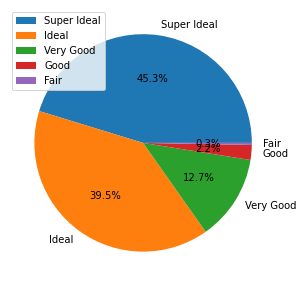

In [25]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(cut, labels=cut.keys(), autopct='%1.1f%%')
ax.legend(labels=cut.keys(), loc=2)

<AxesSubplot:xlabel='cut', ylabel='price'>

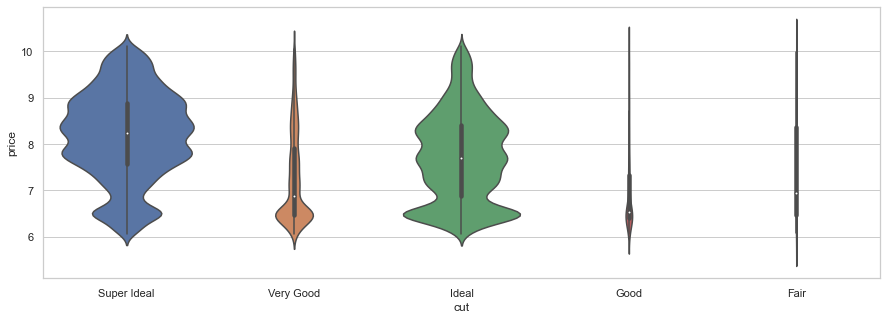

In [26]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.violinplot(x="cut", y="price", data=df, scale="count")

In [27]:
color = df.color.value_counts()
color

E    13239
F     9880
G     9833
D     9428
I     8876
H     8320
J     6338
Name: color, dtype: int64

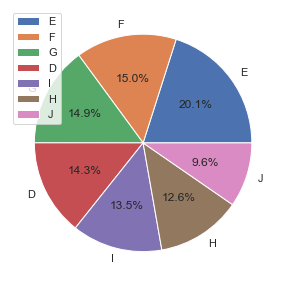

In [28]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(color, labels=color.keys(), autopct='%1.1f%%')
ax.legend(labels=color.keys(), loc=2)

<AxesSubplot:xlabel='color', ylabel='price'>

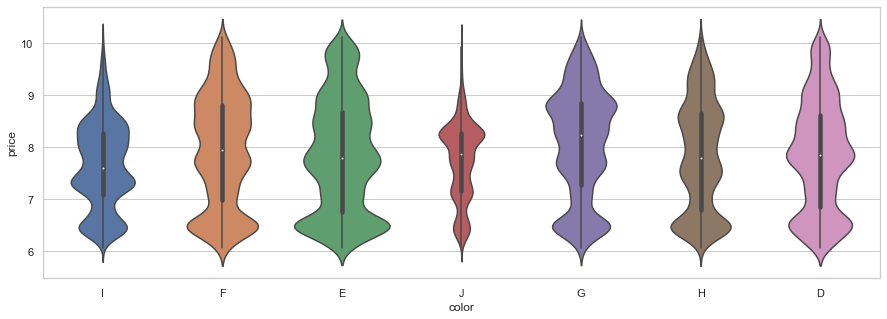

In [29]:
plt.figure(figsize=(15,5))
sns.violinplot(x="color", y="price", data=df, scale="count")

In [30]:
clarity = df.clarity.value_counts()
clarity

VS1     20386
VS2     15156
VVS2    12163
SI1     10485
SI2      4362
VVS1     3070
IF        292
Name: clarity, dtype: int64

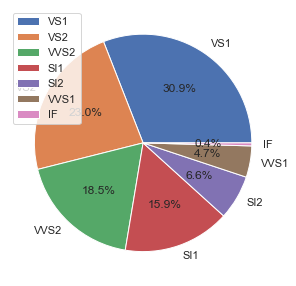

In [31]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(clarity, labels=clarity.keys(), autopct='%1.1f%%')
ax.legend(labels=clarity.keys(), loc=2)

<AxesSubplot:xlabel='clarity', ylabel='price'>

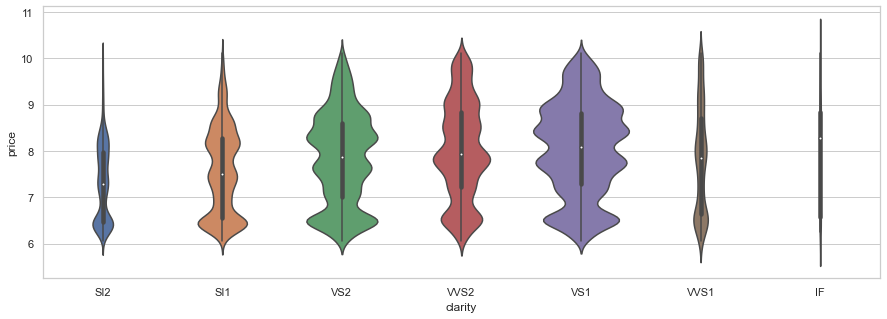

In [32]:
plt.figure(figsize=(15,5))
sns.violinplot(x="clarity", y="price", data=df, scale="count")

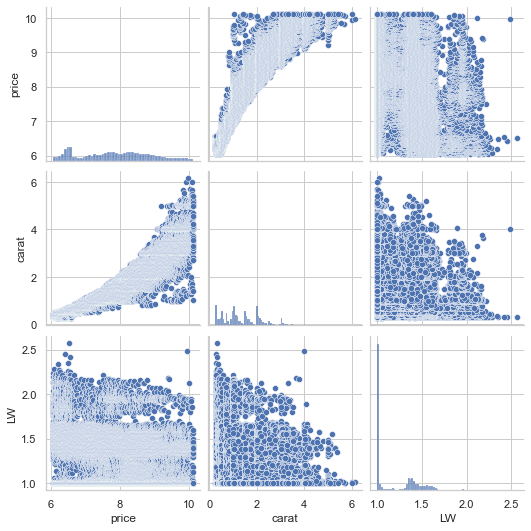

In [33]:
sns.pairplot(df)

In [34]:
df.describe()

,price,carat,LW
count,65914.000000,65914.000000,65914.000000
mean,7.850504,1.464242,1.212862
std,1.023096,0.895973,0.257885
min,6.063785,0.250000,1.000000
25%,7.003065,0.730000,1.000000
50%,7.863267,1.260000,1.020000
75%,8.606576,2.030000,1.410000
max,10.126231,6.150000,2.570000


# Encoder categorical features

In [35]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['shape', 'cut', 'color', 'clarity']

In [36]:
#checking for duplicated values in the categorical columns befor including them into our model
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

shape
Round       29348
Oval         9310
Pear         8643
Emerald      5052
Princess     3680
Cushion      3244
Radiant      2934
Marquise     2079
Heart        1108
Asscher       516
Name: shape, dtype: int64

cut
Super Ideal    29837
Ideal          26034
Very Good       8384
Good            1460
Fair             199
Name: cut, dtype: int64

color
E    13239
F     9880
G     9833
D     9428
I     8876
H     8320
J     6338
Name: color, dtype: int64

clarity
VS1     20386
VS2     15156
VVS2    12163
SI1     10485
SI2      4362
VVS1     3070
IF        292
Name: clarity, dtype: int64



In [37]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

In [38]:
df['shape']=label_encoder.fit_transform(df['shape'])
df['cut']=label_encoder.fit_transform(df['cut'])
df['color']=label_encoder.fit_transform(df['color'])
df['clarity']=label_encoder.fit_transform(df['clarity'])

In [39]:
df.sample(5)

,shape,price,carat,cut,color,clarity,LW
43548,4,7.731931,1.10,3,1,4,1.75
59594,1,8.291547,1.52,2,2,3,1.00
51258,5,7.975908,1.70,2,5,2,1.41
59581,5,8.289037,1.60,3,3,4,1.39
56943,6,8.205218,1.67,3,4,4,1.51


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65914 entries, 0 to 86724
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   shape    65914 non-null  int64  
 1   price    65914 non-null  float64
 2   carat    65914 non-null  float64
 3   cut      65914 non-null  int64  
 4   color    65914 non-null  int64  
 5   clarity  65914 non-null  int64  
 6   LW       65914 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 6.0 MB


But before implementing the linear models, we have to check 3 steps:

- Correlation between variables
- How each independent variable explain price
- If we need to scale our data

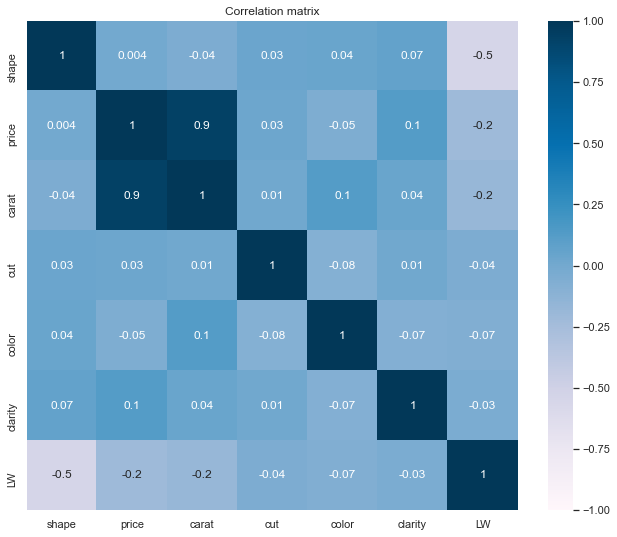

In [41]:
plt.figure(figsize=(11,9))

sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'PuBu' , linecolor='black')

plt.title('Correlation matrix')
plt.savefig('corr_matrix.png')

In [42]:
X_t = df.drop(columns={"price"})
y_t = df.price

In [43]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.eval_measures import rmse

X = X_t
X = sm.add_constant(X_t)
y = y_t
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
resi = rmse(y, y_pred)
print(resi)
model.summary()

0.31567351983090963


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:37:57   Log-Likelihood:                -17526.
No. Observations:               65914   AIC:                         3.507e+04
Df Residuals:                   65907   BIC:                         3.513e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4089      0.012    543.746      0.000       6.386       6.432
shape          0.0115      0.001     20.454      0.000       0.010       0.013
carat          1.0810      0.001    757.237      0.000       1.078       1.084
cut           -0.0019      0.002     -1.117      0.264      -0.005       0.001
color         -0.0886      0.001   -136.080      0.000      -0.090      -0.087
clarity        0.0457      0.001     59.410      0.000       0.044       0.047
LW            -0.1085      0.006    -18.582      0.000      -0.120      -0.097
==============================================================================
Omnibus:                    12261.278   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62873.925
Skew:                          -0.810   Prob(JB):                         0.00
Kurtosis:                       7.502   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

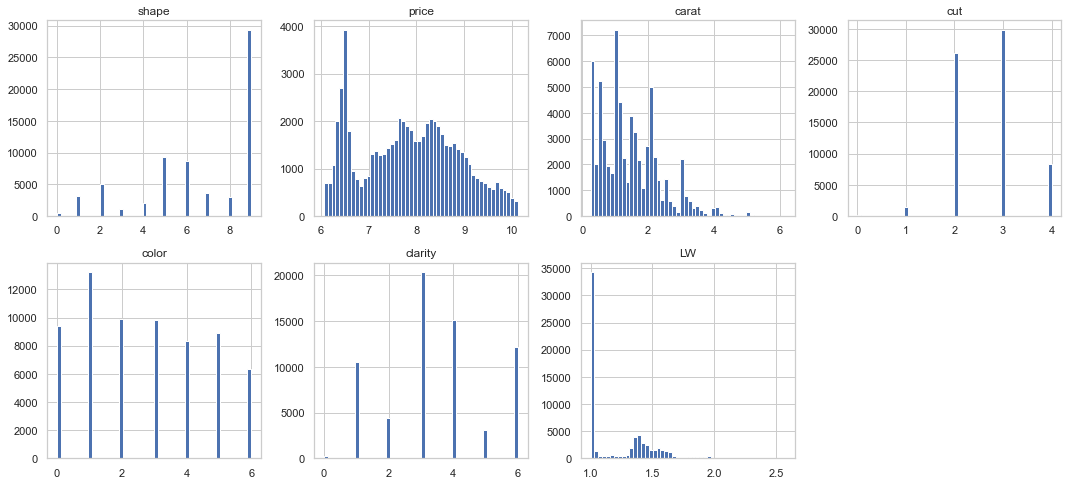

In [44]:
X_notdum = df

figure = plt.figure(figsize=(15,10))

for n, col in enumerate(X_notdum.columns):
    ax = figure.add_subplot(3,4,n+1)
    ax.set_title(col)
    X_notdum[col].hist(ax=ax, bins=50)
    
figure.tight_layout() #this feature separate the graphs correctly
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65914 entries, 0 to 86724
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   shape    65914 non-null  int64  
 1   price    65914 non-null  float64
 2   carat    65914 non-null  float64
 3   cut      65914 non-null  int64  
 4   color    65914 non-null  int64  
 5   clarity  65914 non-null  int64  
 6   LW       65914 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 6.0 MB


In [46]:
df

,shape,price,carat,cut,color,clarity,LW
0,9,6.063785,0.32,3,5,2,1.00
1,9,6.086775,0.30,4,2,2,1.00
2,9,6.086775,0.30,4,1,2,1.00
3,9,6.109248,0.30,4,5,2,1.00
5,9,6.131226,0.30,4,5,2,1.00
...,...,...,...,...,...,...,...
86720,2,10.125430,4.13,3,1,6,1.41
86721,2,10.125831,4.21,3,1,3,1.39
86722,9,10.125831,3.24,3,1,6,1.00
86723,9,10.126231,3.30,3,0,6,1.00


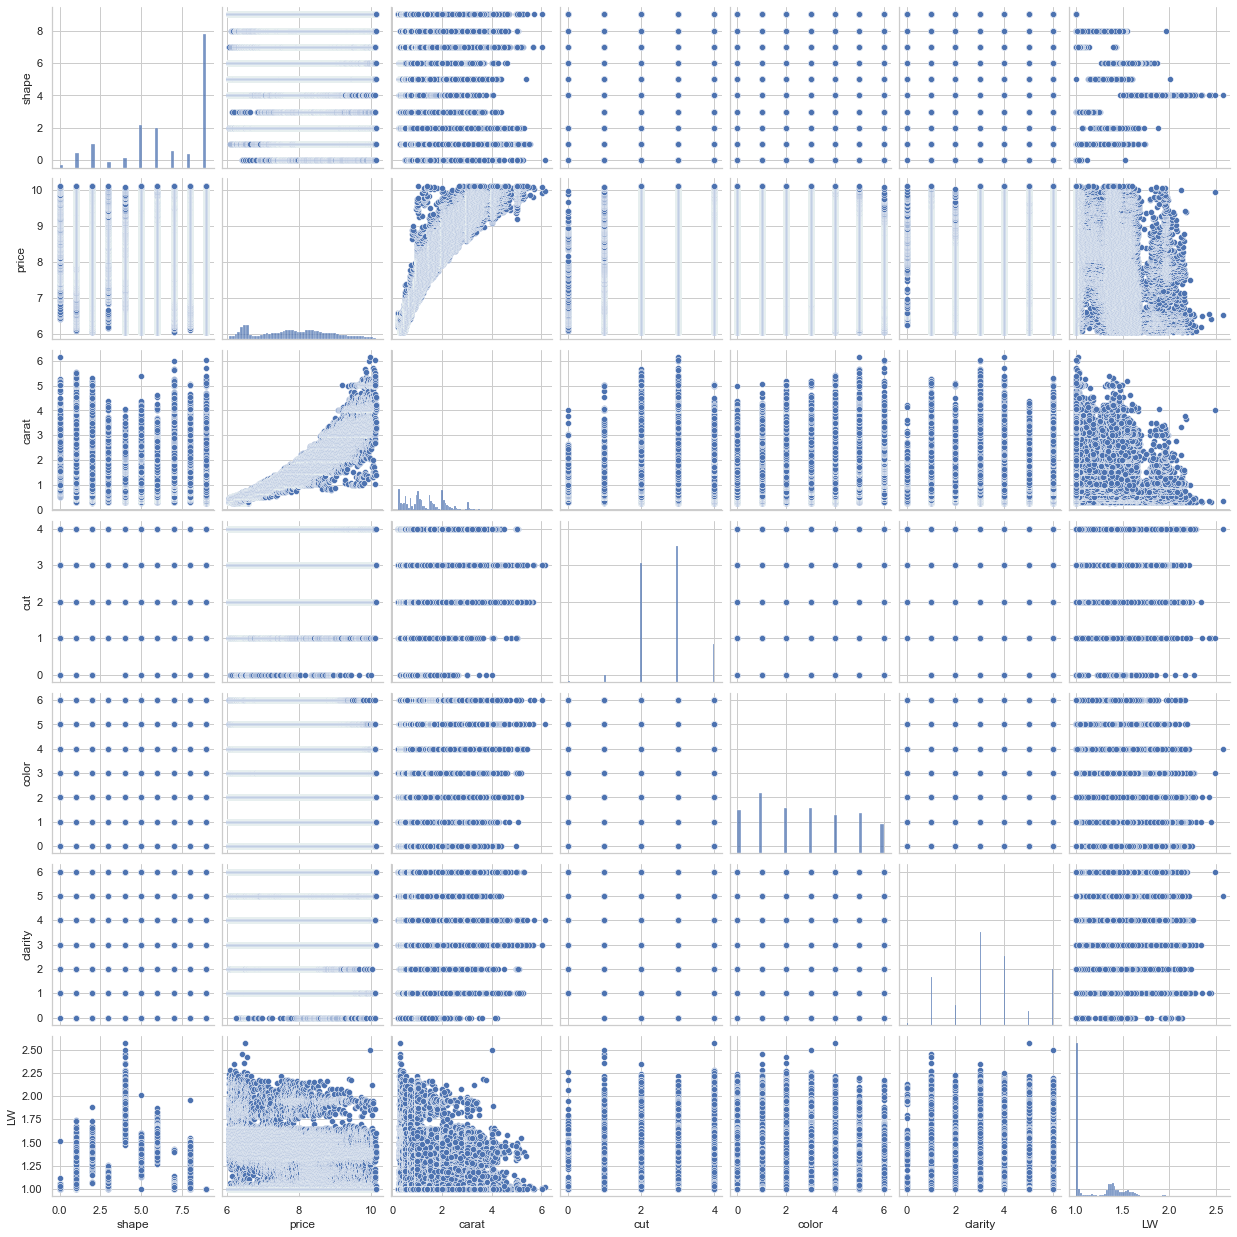

In [47]:
sns.pairplot(df)

# Modelling

In [48]:
train_SS=df.drop(['price'],axis=1)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X = train_SS
Y = np.ravel(y_t) #we use np.ravel to change shape (x,1) to (x,)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1, random_state=10)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=10)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(59322, 6) (6592, 6) (59322,) (6592,)


In [50]:
df.sample(5)

,shape,price,carat,cut,color,clarity,LW
43928,6,7.740664,0.81,4,0,6,1.57
16621,6,6.461468,0.50,3,5,3,1.49
41711,9,7.682482,1.23,2,1,3,1.00
81346,8,9.365633,3.18,2,3,4,1.37
13366,8,6.272877,0.50,4,2,3,1.27


In [51]:
print(X_train.shape)

(59322, 6)


In [52]:
print(X_val.shape)

(6592, 6)


In [53]:
print(X_test.shape)

(6592, 6)


In [57]:
lm = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

lm_reg = Ridge(alpha=1)

#-----------------------------------------------------------------

poly = PolynomialFeatures(degree=2)

X_train_ploy = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()

#-----------------------------------------------------------------


poly1 = PolynomialFeatures(degree=3)

X_train_ploy1 = poly1.fit_transform(X_train.values)
X_val_poly1 = poly1.transform(X_val.values)

lm_poly1 = LinearRegression()
# lm_poly1.fit(X_train_ploy1, Y_train)
# Y_preds_poly = lm_poly1.predict(X_train_ploy1)


# lm_poly1 = LinearRegression()
# X_train_poly1=lm_poly1.fit(poly1.fit_transform(X_train), Y_train)

#---------
poly2 = PolynomialFeatures(degree=4)

X_train_ploy2 = poly2.fit_transform(X_train.values)
X_val_poly2 = poly2.transform(X_val.values)



lm_poly2 = LinearRegression()

#-------
poly3 = PolynomialFeatures(degree=5)

X_train_ploy3 = poly3.fit_transform(X_train.values)
X_val_poly3 = poly3.transform(X_val.values)

lm_poly3 = LinearRegression()
#---------

poly4 = PolynomialFeatures(degree=6)

X_train_ploy4 = poly4.fit_transform(X_train.values)
X_val_poly4 = poly4.transform(X_val.values)

lm_poly4 = LinearRegression()

#---------

poly5 = PolynomialFeatures(degree=7)

X_train_ploy5 = poly5.fit_transform(X_train.values)
X_val_poly5 = poly5.transform(X_val.values)

lm_poly5 = LinearRegression()

In [58]:
lasso = Lasso(alpha=0.1)
#
# Fit the Lasso model
#
lasso.fit(X_train, Y_train)
#
# Create the model score
#
lasso.score(X_train, Y_train), lasso.score(X_val, Y_val)

(0.8839838490038422, 0.8845676348509423)

In [59]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, Y_train) 

model_enet.score(X_train, Y_train),model_enet.score(X_val, Y_val)

(0.9043965524351423, 0.9031514445373932)

# Train scores

In [60]:
#Train
lm.fit(X_train, Y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, Y_train):.3f}')

lm_reg.fit(X_train_scaled, Y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, Y_train):.3f}')

lm_poly.fit(X_train_ploy, Y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_ploy, Y_train):.3f}')

lm_poly1.fit(X_train_ploy1, Y_train)
print(f'Degree 3 polynomial regression train R^2: {lm_poly1.score(X_train_ploy1, Y_train):.3f}')

lm_poly2.fit(X_train_ploy2, Y_train)
print(f'Degree 4 polynomial regression train R^2: {lm_poly2.score(X_train_ploy2, Y_train):.3f}')

lm_poly3.fit(X_train_ploy3, Y_train)
print(f'Degree 5 polynomial regression train R^2: {lm_poly3.score(X_train_ploy3, Y_train):.3f}')


lm_poly4.fit(X_train_ploy4, Y_train)
print(f'Degree 6 polynomial regression train R^2: {lm_poly4.score(X_train_ploy4, Y_train):.3f}')

lm_poly5.fit(X_train_ploy5, Y_train)
print(f'Degree 7 polynomial regression train R^2: {lm_poly5.score(X_train_ploy5, Y_train):.3f}')


lasso.fit(X_train, Y_train)
print(f'Lasso Regression train R^2: {lasso.score(X_train, Y_train):.3f}')

model_enet.fit(X_train, Y_train) 
print(f'ElasticNet Regression train R^2:{ model_enet.score(X_train, Y_train) :.3f}')

Linear Regression train R^2: 0.905
Ridge Regression train R^2: 0.905
Degree 2 polynomial regression train R^2: 0.968
Degree 3 polynomial regression train R^2: 0.974
Degree 4 polynomial regression train R^2: 0.977
Degree 5 polynomial regression train R^2: 0.980
Degree 6 polynomial regression train R^2: 0.984
Degree 7 polynomial regression train R^2: 0.986
Lasso Regression train R^2: 0.884
ElasticNet Regression train R^2:0.904


# Validation scores

In [61]:
#validate

print(f'Linear Regression val R^2: {lm.score(X_val, Y_val):.3f}')

print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, Y_val):.3f}')

print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, Y_val):.3f}')

print(f'Degree 3 polynomial regression val R^2: {lm_poly1.score(X_val_poly1, Y_val):.3f}')

lm_poly2.fit(X_train_ploy2, Y_train)
print(f'Degree 4 polynomial regression val R^2: {lm_poly2.score(X_val_poly2, Y_val):.3f}')

lm_poly3.fit(X_train_ploy3, Y_train)
print(f'Degree 5 polynomial regression val R^2: {lm_poly3.score(X_val_poly3, Y_val):.3f}')

lm_poly4.fit(X_train_ploy4, Y_train)
print(f'Degree 6 polynomial regression val R^2: {lm_poly4.score(X_val_poly4, Y_val):.3f}')

lm_poly5.fit(X_train_ploy5, Y_train)
print(f'Degree 7 polynomial regression val R^2: {lm_poly5.score(X_val_poly5, Y_val):.3f}')

print(f'Lasso Regression val R^2: {lasso.score(X_val, Y_val):.3f}')

print(f'ElasticNet Regression val R^2:{model_enet.score(X_val, Y_val) :.3f}')

Linear Regression val R^2: 0.904
Ridge Regression val R^2: 0.904
Degree 2 polynomial regression val R^2: 0.969
Degree 3 polynomial regression val R^2: 0.975
Degree 4 polynomial regression val R^2: 0.979
Degree 5 polynomial regression val R^2: 0.981
Degree 6 polynomial regression val R^2: 0.979
Degree 7 polynomial regression val R^2: 0.976
Lasso Regression val R^2: 0.885
ElasticNet Regression val R^2:0.903


##### We see polynomial regression with degree 5 is highest score in training and validation

# Test score on selected model 

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred7 = lm_poly3.predict(poly3.transform(X_test))
print("Polynomial Regression degree 5:", r2_score(Y_test, y_pred7))

Polynomial Regression degree 5: 0.9807163307664415


# Error for selected model

In [63]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))
print('RMSE for polynomial regression of degree 5:', RMSE(Y_test,y_pred7))

RMSE for polynomial regression of degree 5: 0.14131713326945558


<Figure size 2160x1080 with 0 Axes>

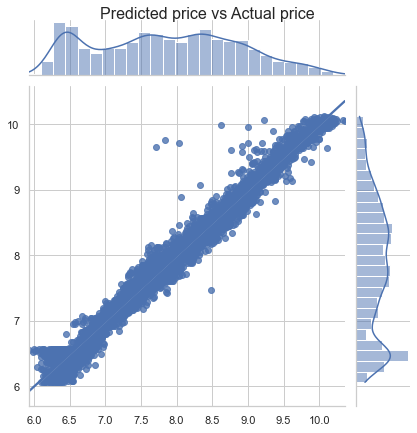

In [64]:
# generate predictions (on training data) using fit model
plt.figure(figsize=[30,15])
sns.jointplot(x=y_pred7,y=Y_test, kind='reg')
title='Predicted price vs Actual price'
plt.suptitle(title, y = 1,fontsize=16)
plt.savefig('pred_act.png')